In [3]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:corrgram’:

    panel.fill

Loading required package: ggplot2
Loading required package: magrittr
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [5]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

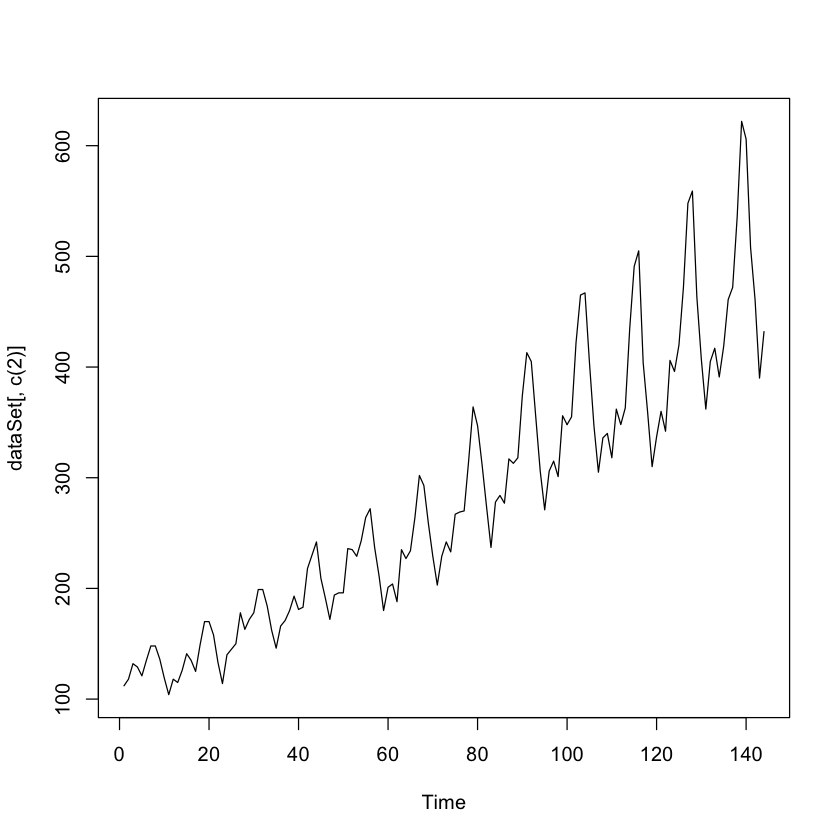

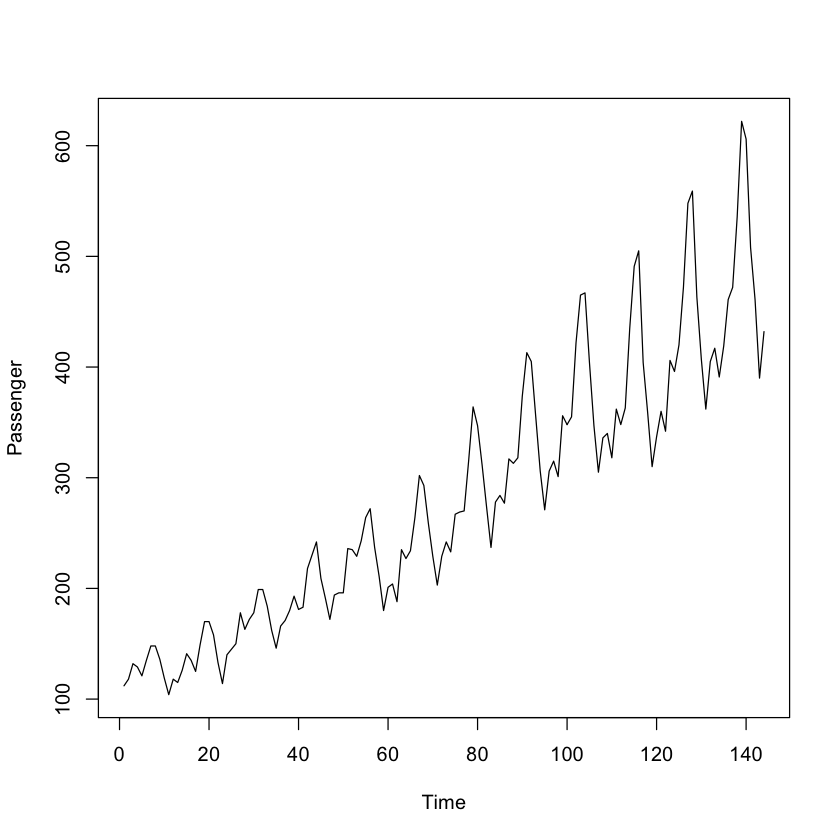

In [6]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [7]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [8]:
# Define the Polynomial model: y ~ poly(x,3, raw = TRUE)
Model = lm(y ~ poly(x,3, raw = TRUE))

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-98.202 -27.753  -6.369  20.411 148.690 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.170e+02  1.541e+01   7.590 4.08e-12 ***
poly(x, 3, raw = TRUE)1  1.268e+00  9.173e-01   1.382    0.169    
poly(x, 3, raw = TRUE)2  1.342e-02  1.467e-02   0.915    0.362    
poly(x, 3, raw = TRUE)3 -2.950e-05  6.653e-05  -0.443    0.658    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.03 on 140 degrees of freedom
Multiple R-squared:  0.862,	Adjusted R-squared:  0.8591 
F-statistic: 291.6 on 3 and 140 DF,  p-value: < 2.2e-16


In [9]:
# Summarise the r_squared for actual and fitted data 
r2 <- cor(fitted(Model), y)^2
summary(Model)$r.squared 
print(r2)

[1] 0.8620391

[1] 0.8620391


In [10]:
# Generate the trendline and fitted values
tendency = coef(Model)[[4]] * x^3 + coef(Model)[[3]] * x^2 + coef(Model)[[2]] * x + coef(Model)[[1]]
print(tendency)

  [1] 118.2508 119.5584 120.8926 122.2531 123.6397 125.0523 126.4906 127.9546
  [9] 129.4440 130.9587 132.4984 134.0630 135.6524 137.2663 138.9046 140.5671
 [17] 142.2535 143.9639 145.6979 147.4553 149.2361 151.0400 152.8669 154.7165
 [25] 156.5888 158.4834 160.4003 162.3393 164.3002 166.2828 168.2869 170.3124
 [33] 172.3591 174.4268 176.5153 178.6244 180.7541 182.9040 185.0741 187.2641
 [41] 189.4738 191.7032 193.9520 196.2200 198.5071 200.8130 203.1377 205.4809
 [49] 207.8425 210.2222 212.6199 215.0355 217.4686 219.9193 222.3872 224.8723
 [57] 227.3743 229.8931 232.4284 234.9801 237.5481 240.1322 242.7321 245.3477
 [65] 247.9788 250.6252 253.2869 255.9635 258.6549 261.3610 264.0815 266.8163
 [73] 269.5652 272.3281 275.1047 277.8948 280.6984 283.5152 286.3450 289.1877
 [81] 292.0431 294.9110 297.7912 300.6836 303.5880 306.5041 309.4319 312.3712
 [89] 315.3217 318.2833 321.2559 324.2392 327.2330 330.2372 333.2517 336.2762
 [97] 339.3105 342.3545 345.4080 348.4709 351.5429 354.6238 357.

In [11]:
# Generate the forecast in the future time horizon
steps = 25
x_in_Future <- (length(x)+1) : (length(x)+steps)

forecastedValues = coef(Model)[[4]] * x_in_Future^3 + coef(Model)[[3]] * x_in_Future^2 + coef(Model)[[2]] * x_in_Future + coef(Model)[[1]]  
print(forecastedValues)

 [1] 493.0820 496.3825 499.6840 502.9864 506.2895 509.5930 512.8968 516.2007
 [9] 519.5046 522.8082 526.1115 529.4141 532.7160 536.0170 539.3168 542.6154
[17] 545.9124 549.2079 552.5015 555.7931 559.0825 562.3696 565.6541 568.9360
[25] 572.2149


In [12]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))

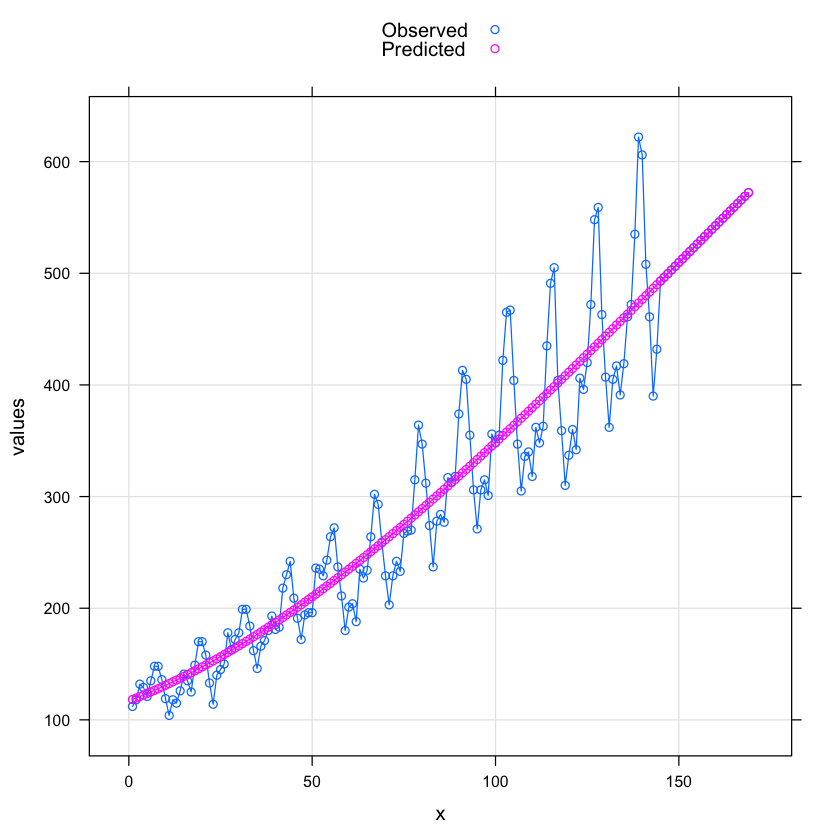

In [13]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)